### User Overview Analysis

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# os.chdir('..')
from src.dbconnection import get_dataFrame_from_database

In [2]:
import sys
sys.path.append('..')

In [3]:
xdr_data = pd.read_csv("../data/processed/xdr_data.csv")

#### Aggregate Each Application per User

In [4]:
from scripts.tellcoAnalysis import aggregate_xdr_data
aggregated_xdr_data=aggregate_xdr_data(xdr_data)
aggregated_xdr_data.head(10)

d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:163: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('MSISDN/Number').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
MSISDN/Number,,,,,,,,,,
33601.675528,182951.226284,665.487661,4923.336797,818.423801,818.423801,8047.787282,159718.700372,158876.532710,34112179.0,3.603373e+15
33601.712373,339.616950,0.602474,22.361212,2.835412,2.835412,12.478941,283.095310,786.175881,38503.0,1.311448e+13
33601.712551,900.610946,3.036290,9.613563,3.596083,3.596083,16.951885,839.795046,682.485438,52478.0,6.917538e+12
33601.713789,1587.337140,4.208402,26.033981,3.285166,3.285166,59.761378,1423.399118,1326.388626,120298.0,1.462771e+13
33601.714799,178.330679,2.489630,14.319698,3.264827,3.264827,24.873000,110.287002,82.594113,176022.0,1.311448e+13
33601.717042,334.691441,0.107064,6.820104,1.872526,1.872526,23.238525,288.996494,332.167601,127918.0,7.349883e+12
33601.718622,1315.473749,5.759823,33.188094,5.832060,5.832060,36.788932,1159.205986,1123.033280,82590.0,1.462771e+13
33601.719194,1335.339310,2.262100,31.151078,5.984782,5.984782,50.726318,1200.017097,237.557823,176459.0,1.462771e+13
33601.720129,437.461975,2.785677,2.586786,0.774081,0.774081,22.863972,380.052268,250.215756,86780.0,1.311448e+13


#### Exploratory Data Analysis (EDA) on Aggregated Data

In [5]:
aggregated_xdr_data.describe()

,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
count,9.003800e+04,90038.000000,90038.000000,90038.000000,90038.000000,90038.000000,9.003800e+04,9.003800e+04,9.003800e+04,9.003800e+04
mean,8.259312e+02,3.045818,23.388865,3.763607,3.763607,37.698678,7.169239e+02,7.153117e+02,1.658846e+05,1.689111e+13
std,4.007920e+04,148.931722,1138.542409,184.112576,184.112576,1843.867901,3.474940e+04,3.501087e+04,8.112136e+06,8.251139e+14
min,3.324901e+01,0.001563,0.023708,0.018176,0.018176,0.184569,3.063580e-01,5.117690e-01,7.146000e+03,6.917538e+12
25%,3.585559e+02,1.210091,11.381826,1.672597,1.672597,18.564679,2.881509e+02,2.849859e+02,7.007000e+04,7.349883e+12
50%,6.183490e+02,2.300906,16.708112,2.793700,2.793700,26.700729,5.429110e+02,5.385891e+02,1.020740e+05,1.304243e+13
75%,8.569936e+02,3.304691,23.536615,3.842333,3.842333,37.903925,7.772646e+02,7.744172e+02,1.727990e+05,1.462771e+13
max,1.202471e+07,44682.944435,341596.376924,55238.582358,55238.582358,553214.085775,1.042554e+07,1.050403e+07,2.433741e+09,2.475544e+17


#### Variable transformations

##### Segment the users into the top five decile classes and Calculate Total Data per Decile Class

In [6]:
from scripts.tellcoAnalysis import segment_users_and_calculate_total_data
total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)

decile_class
Decile 1    1.488405e+07
Decile 2    2.361998e+07
Decile 3    6.089086e+06
Decile 4    1.485374e+07
Decile 5    1.491834e+07
Name: Total_DL_+_UL, dtype: float64


d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()


#### Graphical Representation of Total Dl and Ul with in Decile


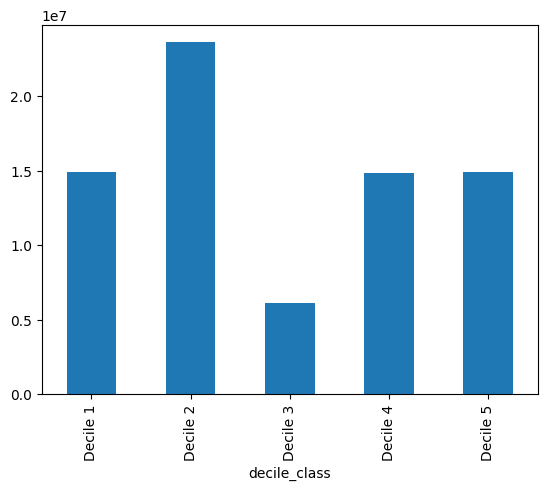

In [9]:
total_data_per_decile.plot(kind='bar')
plt.show()

#### Non-Graphical